In [2]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../")

import westworld
from westworld.assets import *
from westworld.colors import *
from westworld.objects import *
from westworld.agents import *
from westworld.environment import *
from westworld.simulation import *
from westworld.logger import Logger

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


# Playground

## Beta law for fight evaluations

- https://fr.wikipedia.org/wiki/Loi_b%C3%AAta
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html

In [3]:
from scipy.stats import beta

In [4]:
r = beta.rvs(10, 1, size=1000)

In [5]:
from ipywidgets import interact,IntSlider

@interact(a = IntSlider(min = 1,max = 10,value = 1,step = 1),b = IntSlider(min = 1,max = 10,value = 1,step = 1))
def explore(a,b):
    x = np.linspace(0,1,100)
    rv = beta(a, b)
    plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
    plt.show()

interactive(children=(IntSlider(value=1, description='a', max=10, min=1), IntSlider(value=1, description='b', …

In [15]:
def win(a,b):
    return beta.rvs(a, b) > 0.5

## Env development

### Dev decorators

In [6]:
env.data

NameError: name 'env' is not defined

In [63]:
import functools



class Test:

    @staticmethod
    def decorator(func):
        @functools.wraps(func)
        def wrapper_decorator(*args, **kwargs):
            print("Something is happening before the function is called.")
            # Do something before
            value = func(*args, **kwargs)
            print("Something is happening after the function is called.")
            # Do something after
            return value
        return wrapper_decorator
    
    @self.decorator
    def __init__(self):
        pass
    
    @self.decorator
    def render(self):
        pass
    
    
class CTest(Test):
    pass
    
    
    

NameError: name 'self' is not defined

In [8]:
import functools


def decorator(func):
    @functools.wraps(func)
    def wrapper_decorator(self,*args, **kwargs):
        print("Something is happening before the function is called.")
        # Do something before
        print(func)
        value = func(self,*args, **kwargs)
        self.post_init()
        print("Something is happening after the function is called.")
        # Do something after
        return value
    return wrapper_decorator

class Test:
    
    @decorator
    def __init__(self):
        pass
    
    @decorator
    def render(self):
        pass
    
    def post_init(self):
        print("postinit1")
    
    
class CTest(Test):
    
    @decorator
    def __init__(self):
        
        super().__init__()
        
        
    def post_init(self):
        print("postinit2")
    
    
    

In [9]:
env.quit()

In [77]:
t = CTest()

Something is happening before the function is called.
Something is happening before the function is called.
postinit2
Something is happening after the function is called.
postinit2
Something is happening after the function is called.


### Dev env

In [5]:
class Player(BaseAgent):
    
    attrs = ["color","stacked"]
    
    def post_bind(self):
        self.stacked = 1
        self.other_color = RED if self.color == BLUE else BLUE
    
    @property
    def blocking(self):
        return False
    
    def step(self):
        self.wander()
        
    def render(self,screen):
        super().render(screen = screen)
        self.render_text(self.stacked,size = 25)
        
        
#     def prerender(self):

#         player1 = self.env.make_group({"color":RED})
#         player2 = self.env.make_group({"color":BLUE})
        
#         collision1 = self.collides_group(player1,method = "rect")
#         collision2 = self.collides_group(player2,method = "rect")
        
#         self.pop = 1 + (len(collision1) if self.color == RED else len(collision2))

        
class Environment(GridEnvironment):
    
    def count_stacked(self):
        
        count = self.data.groupby(["color","pos"])["stacked"].transform(lambda x : len(x))
        for obj,stacked in count.to_dict().items():
            self[obj].stacked = stacked
            
    def prerender(self):
        self.count_stacked()
        
        

spawner1 = lambda x,y : Player(x,y,color = RED)
spawner2 = lambda x,y : Player(x,y,color = BLUE)

env = Environment(width = 20,height = 10,cell_size=30,show_grid = True)
env.spawn(spawner1,20)
env.spawn(spawner2,20)

env.render()
env.get_img()

AttributeError: 'Player' object has no attribute 'stacked'

In [8]:
sim = Simulation(env,fps = 10)
sim.run_episode(n_steps = 20,replay = True,save = True)

[INFO] Saving video at ./captures/Simulation_1593370143.mp4



interactive(children=(Play(value=0, description='Press play', interval=200, max=20), Output()), _dom_classes=(…

IntSlider(value=0, max=20)

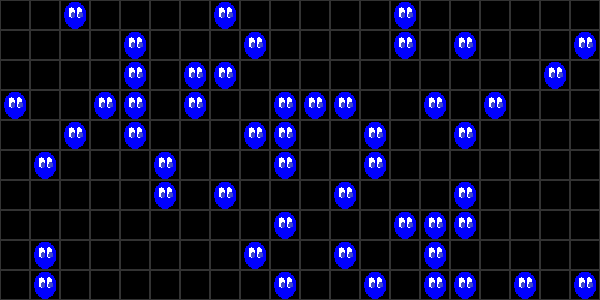

In [12]:
class Player(BaseAgent):
    
    def step(self):
        self.wander()
        

spawner1 = lambda x,y : Player(x,y,color = BLUE,img_asset = "blob")

env = GridEnvironment(width = 20,height = 10,cell_size=30,show_grid = True)
env.spawn(spawner1,50)

env.render()
env.get_img()

In [13]:
sim = Simulation(env,fps = 3)
sim.run_episode(n_steps = 500,replay = True,save = False)

interactive(children=(Play(value=0, description='Press play', interval=200, max=22), Output()), _dom_classes=(…

IntSlider(value=0, max=22)

0